In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from path_explain import set_up_environment
from neural_interaction_detection import NeuralInteractionDetectionExplainerTF


In [4]:
set_up_environment(visible_devices='0')

In [5]:
x = np.random.randn(100, 2).astype(np.float32)
y = x[:, 0] + np.random.randn(100) * 0.1

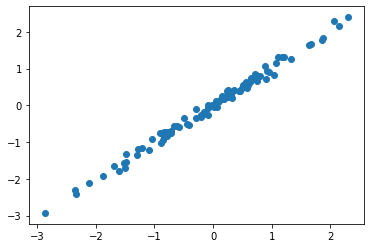

In [6]:
plt.scatter(x[:, 0], y)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(2,)))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(1))

In [8]:
model.layers[0].weights[0]

<tf.Variable 'dense/kernel:0' shape=(2, 8) dtype=float32, numpy=
array([[ 0.6211237 , -0.23568434,  0.29084074, -0.4498317 ,  0.45521545,
         0.60068846,  0.42799997, -0.40515453],
       [ 0.6728146 ,  0.2501278 ,  0.5524677 ,  0.6578512 , -0.5885768 ,
        -0.73645526, -0.07776928, -0.73685455]], dtype=float32)>

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 24        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
              loss=tf.keras.losses.MeanSquaredError())
model.fit(x, y, batch_size=50, epochs=10)

Train on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 2ms/sample - loss: 0.6924
Epoch 2/10
100/100 [==============================] - 0s 42us/sample - loss: 0.2576
Epoch 3/10
100/100 [==============================] - 0s 42us/sample - loss: 0.1165
Epoch 4/10
100/100 [==============================] - 0s 41us/sample - loss: 0.0533
Epoch 5/10
100/100 [==============================] - 0s 41us/sample - loss: 0.0275
Epoch 6/10
100/100 [==============================] - 0s 40us/sample - loss: 0.0183
Epoch 7/10
100/100 [==============================] - 0s 40us/sample - loss: 0.0155
Epoch 8/10
100/100 [==============================] - 0s 41us/sample - loss: 0.0143
Epoch 9/10
100/100 [==============================] - 0s 41us/sample - loss: 0.0133
Epoch 10/10
100/100 [==============================] - 0s 42us/sample - loss: 0.0129


In [15]:
y_pred = model.predict(x)

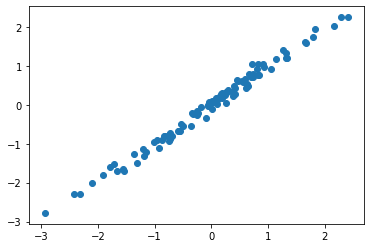

In [16]:
plt.scatter(y, y_pred)

In [45]:
explainer = NeuralInteractionDetectionExplainerTF(model)

In [46]:
interactions = explainer.interactions(inputs=x,
                                      batch_size=50,
                                      output_index=0,
                                      verbose=True)





100%|██████████| 2/2 [00:00<00:00, 1019.15it/s][A


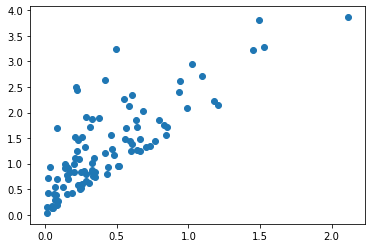

In [ ]:
plt.scatter(np.minimum(np.abs(x[:, 0]), np.abs(x[:, 1])), interactions[:, 0, 1])